In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
P0. Implement a list
'''

class LNode:
    def __init__(self,val):
        self.val = val
        self.next = None

In [3]:
# Create a function for decomposing the parameter mode

def parameter_modes(code):
    
    # Add leading zeros to make 5 digits
    c_str = '0'*(5-len(str(code)))+str(code)
    
    return [c_str[0],c_str[1],c_str[2], c_str[3:]]

In [11]:
incom0 = np.fromfile('17_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(3000)).astype(int)

for i, value in enumerate(incom0):
    vars()['node'+str(i)]=LNode(value)

In [12]:
len(incom0)

4429

In [6]:
def intcode_call(signal_input, incom, pointer_position=0, relative_base=0, reinitialize = False):
    # Re-read input to reset intcom program
    if reinitialize == True:
        incom = np.fromfile('13_input.txt',sep=",").astype(int)
        
    for j, value in enumerate(incom):
        vars()['node'+str(j)]=LNode(value)

    mem = signal_input

    output = []
    
    rel_base = relative_base
    i = pointer_position

    while i <= len(incom):
        
        #print(i)

        # decode the parameter modes
        p_modes = parameter_modes(vars()['node'+str(i)].val)

        # build instruction

        # retrieve parameters for specific opcode
        if p_modes[-1] in ['99']:
            instr = [99]
            #print('Opcode 99 executed.')
            
            # Prepare incom for return
            incom_out = []
            for j in range(len(incom)):
                incom_out = incom_out + [vars()['node'+str(j)].val]
            #print('program complete')
            
            #output = []
            
            return output, incom_out, i, rel_base
            break
        
        elif p_modes[-1] in ['01', '02', '07', '08']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+4):
                instr += [vars()['node'+str(j)].val]
            i += 4

        elif p_modes[-1] in ['03', '04','09']:
            instr = [int(p_modes[-1])] + [vars()['node'+str(i+1)].val]
            i += 2

        elif p_modes[-1] in ['05', '06']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+3):
                instr += [vars()['node'+str(j)].val]
            i += 3

        else:
            print('Uh oh... intruction not understood')
            break
            
        #print(p_modes)
        #print(instr)


        # Execute instructions
        
        # ADDITION # ==========================================================================
        if instr[0] == 1:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = a+b # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        
        # MULTIPLICATION # =========================================================
        elif instr[0] == 2:
            # define a
            a = instr[1] # default is immediate mode
            #print('immediate mode a = ' + str(a))
            if p_modes[2] == '0': # if parameter is position mode
                #print('position mode a = ' + str(a))
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                #print('relative mode a = ' + str(a))

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = int(a)*int(b) # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        # INPUT # =====================================================================        
        elif instr[0] == 3:
            # write input (mem)
            if p_modes[2] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[1])].val = mem #[0]
                #mem = mem[1:]
            else:
                #print(len(mem))
                vars()['node'+str(instr[1])].val = mem #[0]
                #mem = mem[1:]
        
        
        # OUTPUT # =================================================================
        elif instr[0] == 4:
            # define a
            #print('output parameter mode: ' + str(p_modes[2]) +
            #      ', parameter: ' + str(instr[1]))
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                

            # write to output
            output = output + [a]
            #print('output:', output)
            #if len(output) == 1:
                # Repackage the nodes as incom
                #incom_out = []
                #for j in range(len(incom)):
                    #incom_out = incom_out + [vars()['node'+str(j)].val]

                #return output, incom_out, i, rel_base

        
        # JUMP IF TRUE # ===========================================================
        elif instr[0] == 5:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                #print('retrieving node ' + str(instr[1]))
                a = vars()['node'+str(instr[1])].val
                #print('a is' + str(a))
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-true. Check for parameter mode 2!")
                break
            else:
                #print('a is' + str(a))
                if a != 0:
                    i = b
                    
                    
        # JUMP IF FALSE # ===========================================================
        elif instr[0] == 6:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                if a == 0:
                    i = b
                    
        # LESS THAN # ==========================================================================
        elif instr[0] == 7:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a < b:
                #print(str(a) + 'is less than' + str(b))
                ab = 1
            else:
                #print(str(a) + 'is NOT less than' + str(b))
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab 
            else:
                #print('setting node ' + str(instr[3]) + 'to be ' + str(ab))
                vars()['node'+str(instr[3])].val = ab 

        # EQUALS # ========================================================================
        elif instr[0] == 8:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a == b:
                ab = 1
            else:
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab
                
        # ADJUST RELATIVE BASE # =============================================================
        elif instr[0] == 9:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # execute: adjust relative base
            if p_modes[1] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[1] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                rel_base += a
                #print('Relative base now:'+str(rel_base))
                

        else:
            print('Instruction not understood!')
            break

    #if i > len(incom):
    #    print('End of input code reached.')
        
    # Repackage the nodes as incom
    incom_out = []
    for j in range(len(incom)):
        incom_out = incom_out + [vars()['node'+str(j)].val]
        
    print('returning at end of intcode')

    return output, incom_out, i, rel_base

Run the Intcode to get the camera feed:



In [15]:
# No input
output, incom, pointer, relative_base = intcode_call(signal_input=[], incom=incom0, pointer_position=0, relative_base=0)


In [80]:
# Define a function to read the output:

def image_read(signal):
    # define the output image:
    img_out = np.zeros((60,60))
    
    # create a cursor to navigate the output image
    cur = 0,0
    
    # Decode the instructions in the signal, one by one
    for dig in signal:
        if dig == 35:
            img_out[cur[0],cur[1]] = 1
            cur = np.add(cur,(0,1))
        elif dig == 46:
            cur = np.add(cur,(0,1))
        elif dig == 10:
            cur = np.add(np.multiply(cur,(1,0)),(1,0))
        else:
            print('ASCII digit not understood: ' + str(dig))
            print('Assuming its the droid and asigning 1 to img!')
            img_out[cur[0],cur[1]] = 1
            cur = np.add(cur,(0,1))
            
    return img_out         

ASCII digit not understood: 94
Assuming its the droid and asigning 1 to img!


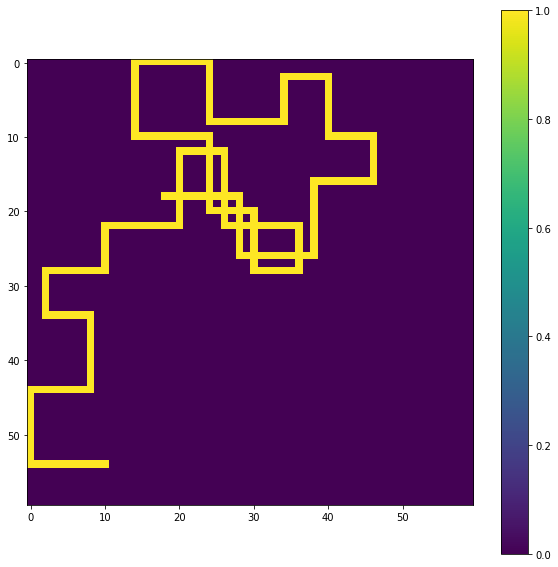

In [81]:
img = image_read(output)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.colorbar()

Ah! I bet '94' is the code for a droid. It's placed at one end of the scaffold!

I had a novel idea for identifying an intersection... say the value of a scaffold is 1 and space is zero. Then the sum of the values for a point and each adjacent point will be 3 at a normal point and 5 for an intersection point. Instead of running loops to add up values for each point, I realized that I could shift the _entire maps_ and then add the shifted maps!

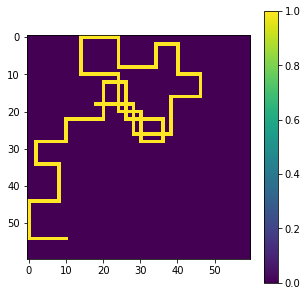

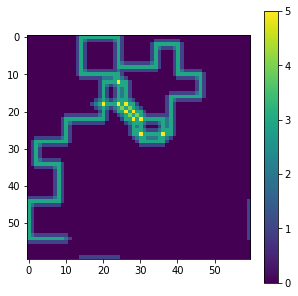

In [82]:
# Calculate the shifted ('rolled') maps:
img_r01 = np.roll(img,1,axis=0)
img_r0n1 = np.roll(img,-1,axis=0)
img_r11 = np.roll(img,1,axis=1)
img_r1n1 = np.roll(img,-1,axis=1)

# Sum the maps:
img_rolled = img + img_r01 + img_r0n1 + img_r11 + img_r1n1

# Plot the result:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.colorbar()

plt.figure(figsize=(5,5))
plt.imshow(img_rolled)
plt.colorbar()

In [89]:
# Find the intersections:
intersect_coords = np.array(np.where(img_rolled == 5)).T

# Calculate the sum of the products:
np.sum(np.product(intersect_coords,axis=1))

5620

Part Deux!